# Lagrange's method

The file `lagrange_neville.pdf` presents some notes about the Lagrange's method (Kiusalaas, 2013, p. 105).

#### References

* Kiusalaas, J. Numerical methods in engineering with Python 3, 3rd edition, Cambridge University Press, 2013, ISBN 978-1-107-03385-6

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#used for inserting images
from IPython.display import Image as img

In [2]:
x = np.linspace(0., 10., 5) # x coordinates of the data
y = np.sin(2.*np.pi*x/10.)  # data values

In [3]:
x0 = np.linspace(-3., 13., 30) # x coordinates of the interpolating points
y0 = np.sin(2.*np.pi*x0/10.)   # true values of the original function at the interpolation points

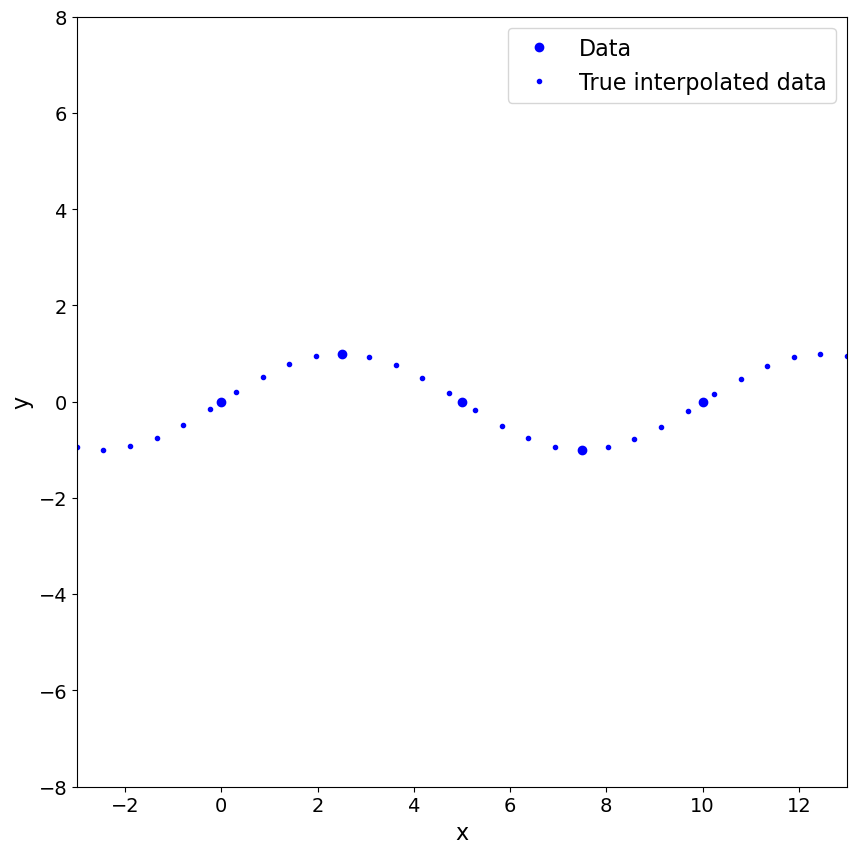

In [4]:
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b.', label='True interpolated data')
plt.xlim(np.min(x0), np.max(x0))
plt.ylim(-8., 8.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=16)
plt.show()

### Simple implementation

The function below implements the Lagrange's method for interpolation. This function uses the routine [`numpy.ones`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) for creating an array with boolean elements. This function also uses the routines [`numpy.prod`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.prod.html), [`numpy.sum`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), and [`numpy.roll`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.roll.html).

In [5]:
def my_lagrange(x, y, xc):
    '''
    Return an interpolated point by applying
    the Lagrange's method.
    
    input
    x: numpy array 1D - x coordinates
    y: numpy array 1D - given values of a function y(x)
    xc: float - coordinate x of the interpolating point
    
    output
    yc: float - interpolated ordinate at xc
    '''
    # boolean array
    mask = np.ones(x.size, dtype=bool)
    mask[0] = False
    l = np.empty_like(x)
    for j, xj in enumerate(x):
        l[j] = np.prod(xc - x[mask])
        l[j] /= np.prod(xj - x[mask])
        mask = np.roll(mask,1)
    yc = np.sum(l*y)
    return yc

##### What is a boolean array?

In [6]:
np.zeros(4, dtype=bool)

array([False, False, False, False])

In [7]:
np.ones(4, dtype=bool)

array([ True,  True,  True,  True])

##### How the routine [`numpy.roll`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.roll.html) works

In [8]:
vector = np.arange(7)

print(vector)

[0 1 2 3 4 5 6]


In [9]:
print(np.roll(vector, 1))
print(np.roll(vector, 2))
print(np.roll(vector, -1))
print(np.roll(vector, -2))

[6 0 1 2 3 4 5]
[5 6 0 1 2 3 4]
[1 2 3 4 5 6 0]
[2 3 4 5 6 0 1]


### Interpolation calculated by using the function `my_lagrange`

The cell below shows how to use the function `my_lagrange` for interpolating the function `y` on a set of points `x0`.

In [10]:
my_result = np.empty_like(x0)
for i, xc in enumerate(x0):
    my_result[i] = my_lagrange(x, y, xc)

### Interpolation calculated by using the function [`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)

In [11]:
Lagrange = lagrange(x,y)

In [12]:
scipy_result = Lagrange(x0)

### Validation test

In [13]:
np.allclose(scipy_result, my_result)

True

### Results

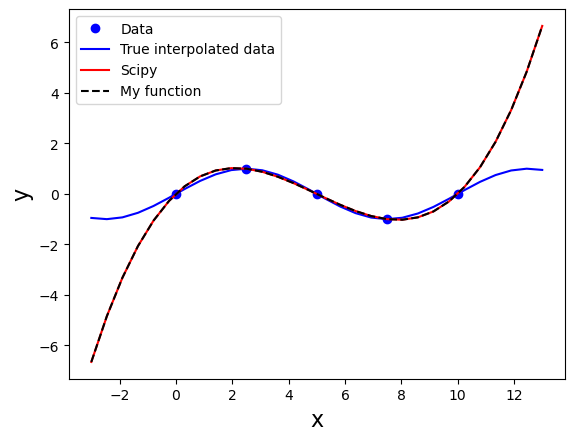

In [14]:
plt.figure()
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b-', label='True interpolated data')
plt.plot(x0, scipy_result, 'r-', label='Scipy')
plt.plot(x0, my_result, 'k--', label = 'My function')
plt.legend(loc='best', numpoints=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend(loc='best', numpoints=1)
plt.show()